In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr
import functions as main

import warnings
warnings.filterwarnings('ignore')

# Load Full Clean Df

In [19]:
opencsv = pd.read_csv(r"D:\OneDrive - Instituto Politecnico de Castelo Branco\002_Learning\001_Pos_Graduacao\Ciclo 5 - Projeto Final\ProjetoFinal-PosGraduacaoEngenhariaFinanceira\full_clean_df.csv", sep=",")
opencsv.set_index('Date', inplace=True)
opencsv.index = pd.to_datetime(opencsv.index)
opencsv = opencsv.astype(float)

In [20]:
opencsv.tail()

,JPY_EUR,BTC_PageViews,Crypto_PageViews,BTC_Supply,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,...,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-12,0.005814,4441.0,29.0,1.972469e+07,0.173909,-0.387231,-2.548467,-0.196386,1.105177,1.510878,...,-0.570336,0.877535,0.961116,0.570098,0.417108,-0.489437,0.674785,0.793739,1.231448,-0.438803
2024-07-19,0.005837,4161.0,27.0,1.972799e+07,2.010968,0.811656,0.388939,-0.196386,0.394258,0.343247,...,-2.357618,-2.370832,-0.891638,-1.991920,-0.491820,-1.527084,-0.826117,-0.863727,-1.032944,0.519523
2024-07-26,0.005995,4953.0,48.0,1.973157e+07,0.161521,-0.162987,-0.249010,-0.196386,-0.715811,1.628331,...,-1.641331,0.236801,-1.039582,-0.833632,-0.420328,-1.313737,-0.144462,0.083399,-0.310420,0.411927
2024-08-02,0.006054,4674.0,27.0,1.973481e+07,-1.441678,2.726636,0.655882,-0.307659,-0.435790,0.524561,...,0.783129,0.929002,2.014718,1.504548,1.309564,0.800172,0.981952,0.983564,-0.401305,0.014407
2024-08-09,0.006054,5059.0,28.0,1.973761e+07,-0.331783,-0.564304,-0.897957,-0.307659,0.058476,-0.034063,...,-0.010564,0.183964,0.183092,0.087901,-0.201906,-0.082311,-0.156229,-0.160874,0.496958,0.175323


In [21]:
full_sample = opencsv.loc["2010-9-10":"2024-07-26"]
full_sample

,JPY_EUR,BTC_PageViews,Crypto_PageViews,BTC_Supply,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,...,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,,,,,
2010-10-01,0.008780,NaN,NaN,4.157600e+06,-0.291692,-0.080586,-0.042738,-1.309421,1.094003,1.109584,...,-1.079620,-1.326496,-0.048535,-1.813269,0.660546,0.505392,1.135990,0.806592,-0.017511,0.372463
2010-10-08,0.008710,NaN,NaN,4.206900e+06,0.412845,-0.404645,0.648508,1.929753,1.104355,1.403863,...,0.693472,0.797672,1.570852,0.741525,0.847527,0.911464,-0.019659,1.101136,-0.104825,-0.884474
2010-10-15,0.008720,NaN,NaN,4.267300e+06,0.224014,-0.356657,-0.716145,0.290535,0.515537,1.128018,...,1.969096,0.744594,-0.225812,0.153508,0.589983,0.856091,-2.202740,-1.083577,-0.051403,-0.224384
2010-10-22,0.008840,NaN,NaN,4.349150e+06,-0.173006,0.218665,-0.394398,0.302804,-0.573261,0.314354,...,-0.059123,0.452523,-0.119477,0.579312,-1.516202,-0.998916,0.900158,0.687278,0.037347,1.404101
2010-10-29,0.008890,NaN,NaN,4.423100e+06,1.987460,-0.404645,0.817632,-1.998972,-0.514017,-0.298105,...,0.438356,-0.636118,-0.828680,-0.333114,0.896919,1.216017,-0.369190,0.227349,-0.080124,-0.900285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-28,0.005808,3687.0,17.0,1.971838e+07,-1.096763,-0.287993,0.693789,-1.249804,-0.012735,-0.833454,...,-0.157753,-0.263855,1.351050,0.318987,0.095952,-0.284732,-1.422751,-1.017257,-0.089459,0.799206
2024-07-05,0.005730,4547.0,28.0,1.972142e+07,-1.033043,-1.534834,2.426331,0.274254,1.180797,-0.655342,...,1.231643,0.564620,1.116106,-0.170522,1.371988,1.711919,0.481538,0.775981,-0.698743,-0.969224
2024-07-12,0.005814,4441.0,29.0,1.972469e+07,0.173909,-0.387231,-2.548467,-0.196386,1.105177,1.510878,...,-0.570336,0.877535,0.961116,0.570098,0.417108,-0.489437,0.674785,0.793739,1.231448,-0.438803


In [22]:
full_sample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 722 entries, 2010-10-01 to 2024-07-26
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   JPY_EUR             722 non-null    float64
 1   BTC_PageViews       474 non-null    float64
 2   Crypto_PageViews    474 non-null    float64
 3   BTC_Supply          722 non-null    float64
 4   BTC_USD             722 non-null    float64
 5   Mining_Difficulty   722 non-null    float64
 6   USD_OnChain_Volume  722 non-null    float64
 7   M2_Liquidity        722 non-null    float64
 8   EUR_USD             722 non-null    float64
 9   JPY_USD             722 non-null    float64
 10  SPY                 722 non-null    float64
 11  QQQ                 722 non-null    float64
 12  EXSA                722 non-null    float64
 13  JPXN                722 non-null    float64
 14  IWDA                722 non-null    float64
 15  GLD                 722 non-null    fl

In [23]:
full_sample = full_sample.drop(columns=["BTC_PageViews", "Crypto_PageViews"])
full_sample

,JPY_EUR,BTC_Supply,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,SPY,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,,,
2010-10-01,0.008780,4.157600e+06,-0.291692,-0.080586,-0.042738,-1.309421,1.094003,1.109584,-0.378162,-1.079620,-1.326496,-0.048535,-1.813269,0.660546,0.505392,1.135990,0.806592,-0.017511,0.372463
2010-10-08,0.008710,4.206900e+06,0.412845,-0.404645,0.648508,1.929753,1.104355,1.403863,0.789831,0.693472,0.797672,1.570852,0.741525,0.847527,0.911464,-0.019659,1.101136,-0.104825,-0.884474
2010-10-15,0.008720,4.267300e+06,0.224014,-0.356657,-0.716145,0.290535,0.515537,1.128018,0.369584,1.969096,0.744594,-0.225812,0.153508,0.589983,0.856091,-2.202740,-1.083577,-0.051403,-0.224384
2010-10-22,0.008840,4.349150e+06,-0.173006,0.218665,-0.394398,0.302804,-0.573261,0.314354,0.091212,-0.059123,0.452523,-0.119477,0.579312,-1.516202,-0.998916,0.900158,0.687278,0.037347,1.404101
2010-10-29,0.008890,4.423100e+06,1.987460,-0.404645,0.817632,-1.998972,-0.514017,-0.298105,-0.187107,0.438356,-0.636118,-0.828680,-0.333114,0.896919,1.216017,-0.369190,0.227349,-0.080124,-0.900285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-28,0.005808,1.971838e+07,-1.096763,-0.287993,0.693789,-1.249804,-0.012735,-0.833454,-0.196526,-0.157753,-0.263855,1.351050,0.318987,0.095952,-0.284732,-1.422751,-1.017257,-0.089459,0.799206
2024-07-05,0.005730,1.972142e+07,-1.033043,-1.534834,2.426331,0.274254,1.180797,-0.655342,1.135617,1.231643,0.564620,1.116106,-0.170522,1.371988,1.711919,0.481538,0.775981,-0.698743,-0.969224
2024-07-12,0.005814,1.972469e+07,0.173909,-0.387231,-2.548467,-0.196386,1.105177,1.510878,0.391958,-0.570336,0.877535,0.961116,0.570098,0.417108,-0.489437,0.674785,0.793739,1.231448,-0.438803


In [26]:
full_sample.isna().sum()

JPY_EUR               0
BTC_Supply            0
BTC_USD               0
Mining_Difficulty     0
USD_OnChain_Volume    0
M2_Liquidity          0
EUR_USD               0
JPY_USD               0
SPY                   0
QQQ                   0
EXSA                  0
JPXN                  0
IWDA                  0
GLD                   0
SLV                   0
TLT                   0
BND                   0
Nr_Transactions       0
Nr_Addresses          0
dtype: int64

# PACF - BTC USD Price

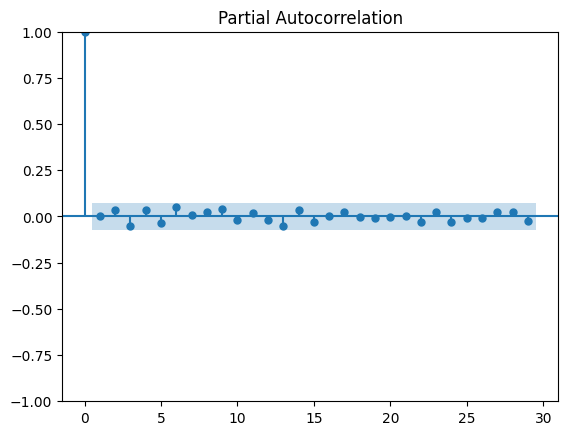

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(full_sample.BTC_USD)
plt.show()

**So consider an AR(1)**

# Determine max number lags

In [29]:
df_train = full_sample[:int(0.9*(len(full_sample)))]
df_test = full_sample[int(0.9*(len(full_sample))):]

We can test the performance of our model by using the following methods:

**Akaike information criterion (AIC)**: It quantifies the quality of a model by balancing the fit of the model to the data with the complexity of the model. AIC provides a way to compare different models and choose the one that best fits the data with the least complexity.

**Bayesian information criterion (BIC)**: This stats measure is used for model selection among a set of candidate models. Like the Akaike information criterion (AIC), BIC provides a trade-off between the goodness of fit and model complexity. However, BIC places a stronger penalty on the number of parameters than AIC does, which can help prevent overfitting.

In [44]:
model = VAR(df_train)
model.select_order(15).summary()

,AIC,BIC,FPE,HQIC
0,12.84,12.98,3.777e+05,12.89
1,-0.7762,1.892*,0.4603,0.2600*
2,-1.756*,3.447,0.1732*,0.2641
3,-1.420,6.319,0.2441,1.585
4,-1.249,9.024,0.2933,2.740
5,-0.8111,12.00,0.4646,4.163
6,-0.4212,14.92,0.7089,5.537
7,-0.03630,17.84,1.090,6.906
8,0.3620,20.78,1.727,8.289
9,0.7322,23.68,2.710,9.643


# Fit a VAR Model

In [71]:
model_fit = model.fit(maxlags=2)
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 21, Aug, 2024
Time:                     23:57:24
--------------------------------------------------------------------
No. of Equations:         19.0000    BIC:                    3.70670
Nobs:                     647.000    HQIC:                  0.571746
Log likelihood:          -16244.1    FPE:                   0.243501
AIC:                     -1.41541    Det(Omega_mle):       0.0800801
--------------------------------------------------------------------
Results for equation JPY_EUR
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                         0.043055         0.023806            1.809           0.071
L1.JPY_EUR                    0.004269         0.040697            0.105           0.916
L1.BTC_Supply             

prob = p-value

In [70]:
df_coeff=pd.DataFrame([model_fit.params["BTC_USD"], model_fit.pvalues["BTC_USD"]]).T
df_coeff.columns = ["coeff", "pval"]
df_coeff = df_coeff.query("pval < 0.05")
df_coeff

,coeff,pval
L1.SPY,0.354227,0.001851
L2.USD_OnChain_Volume,-0.119166,0.017844
L2.SLV,0.144537,0.036025


# So our final model is:

Só considera prob / p-value < 0.05


BTC_USD = -0.11L1.EUR_USD + 0.35L1.SPY - 0.12L2.USD_OnChain_Volume + 0.14L2.SLV


# The Granger causality test is a statistical hypothesis test for determining whether one time series is useful in forecasting another

# Validate model - MAE and RMSE

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Step 1: Make predictions on the test set
# We start predicting after the last lag in the training set

# Initialize an empty DataFrame to store results for each lag
results_df = pd.DataFrame(columns=["Lag", "MAE", "RMSE", "MAPE"])

# Iterate over different lag values
for lag in range(1, 15):  # Start at 1 to avoid using a zero-lag, which doesn't make sense
    # Re-fit the model for the current lag
    model = VAR(df_train)
    model_fit = model.fit(maxlags=lag)
    
    # Make predictions on the test set
    n_forecast = len(df_test)
    forecast = model_fit.forecast(df_train.values[-lag:], steps=n_forecast)

    # Convert the forecast to a DataFrame with the same column names as df_train
    forecast_df = pd.DataFrame(forecast, index=df_test.index, columns=df_test.columns)

    # Calculate MAE, RMSE, and MAPE for the specific column ('BTC_USD')
    mae = mean_absolute_error(df_test.BTC_USD, forecast_df.BTC_USD)
    rmse = np.sqrt(mean_squared_error(df_test.BTC_USD, forecast_df.BTC_USD))
    mape = mean_absolute_percentage_error(df_test.BTC_USD, forecast_df.BTC_USD)

    # Save the results into the DataFrame using pd.concat
    result_row = pd.DataFrame({"Lag": [lag], "MAE": [mae], "RMSE": [rmse], "MAPE": [mape]})
    results_df = pd.concat([results_df, result_row], ignore_index=True)
    
# Set the 'Lag' column as the index
results_df.set_index("Lag", inplace=True)

# Display the results DataFrame
print(results_df)

'''# Print the results
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)'''

          MAE      RMSE      MAPE
Lag                              
1    0.701087  0.987829  1.076704
2    0.692329  0.969872  1.106299
3    0.690581  0.964230  1.167239
4    0.693473  0.978060  1.125921
5    0.698285  0.982726  1.158795
6    0.701262  0.988140  1.186228
7    0.696794  0.980322  1.229169
8    0.702307  0.985784  1.407856
9    0.720032  0.991801  1.488502
10   0.692219  0.957135  1.590059
11   0.689558  0.957538  1.595409
12   0.705483  0.962060  1.989079
13   0.715390  0.970292  1.857807
14   0.720355  0.970974  1.623504


'# Print the results\nprint("Mean Absolute Error (MAE):", mae)\nprint("Root Mean Squared Error (RMSE):", rmse)\nprint("Mean Absolute Percentage Error (MAPE):", mape)'

**RMSE of test > RMSE of train => OVER FITTING of the data.**

**RMSE of test < RMSE of train => UNDER FITTING of the data.**

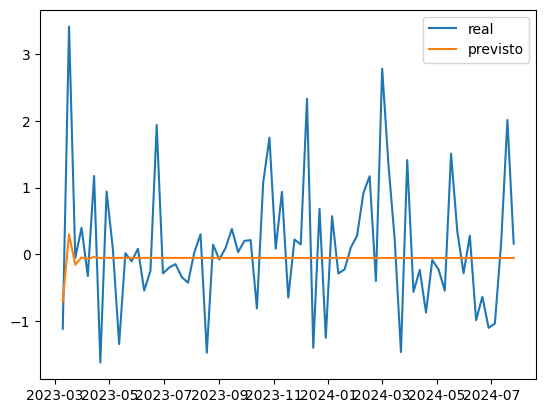

In [56]:
plt.plot(df_test.BTC_USD,label='real')
plt.plot(forecast_df.BTC_USD,label='previsto')
plt.legend()